In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
framingham_train = pd.read_csv("framingham_train.csv")
framingham_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,37,Some high school,0,0,0,0,0,0,300,112.0,60.0,23.67,81,75,0
1,1,42,Some college/vocational school,1,10,0,0,0,0,175,116.0,72.5,28.61,63,95,0
2,0,42,Some high school,1,20,0,0,1,0,199,141.0,92.0,43.69,80,60,1
3,0,55,High school/GED,1,5,0,0,0,0,315,123.0,77.5,26.21,75,84,0
4,1,56,High school/GED,1,20,0,0,0,0,270,109.0,75.0,24.58,67,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0,40,High school/GED,1,9,0,0,0,0,207,124.0,78.0,22.90,46,66,0
2556,0,44,Some college/vocational school,0,0,0,0,0,0,180,110.0,70.0,23.98,92,67,1
2557,1,37,High school/GED,1,20,0,0,0,0,232,129.0,74.0,24.46,86,88,0
2558,0,55,Some college/vocational school,0,0,0,0,1,0,262,122.5,84.0,28.68,66,76,1


Part ai.

In [3]:
original_logistic_regression = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose', data = framingham_train).fit()
print(original_logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.379592
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Thu, 09 Oct 2025   Pseudo R-squ.:                  0.1147
Time:                        19:45:42   Log-Likelihood:                -971.75
converged:                       True   LL-Null:                       -1097.6
Covariance Type:            nonrobust   LLR p-value:                 9.215e-44
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Part ai.

In [4]:
coefficient_prevalentStroke =  0.6558 
odds_ratio = np.exp(coefficient_prevalentStroke)
odds_ratio

np.float64(1.9266832476001812)

The coefficients can be seen above, to find the odds perform the equation e^(coefficient). The most important risk factors for 10-year CHD are being male, BPMeds, and prevalentStroke. I chose prevalentStroke has it has the highest value coefficient which indicates that per unit change, it increases risk of 10-year CHD the most. Converting it to log odds we get approximately 1.93. It must be acknowledge though that the p-value (0.218) is a fair amount greater than our threshold of 0.05 which means that it is statiscally insignificant. 

Part aiii.

Expected values: 
For prescribe: (0.15p * 1,100,000) + (1 - 0.15p) * 150,000 = 142,500p + 150,000
For not prescribe: 950,000p
Set equal to each other: 142,500p + 150,000 = 950,000p
p ~= 0.186

I just set the expected values of both sides of the tree equal to one another and solved for the p threshold of indifference. Therefore, if the probability given by the logistic regression for an individual is greater than 0.186 than we prescribe, otherwise not.  

In [5]:
framingham_test = framingham_train = pd.read_csv("framingham_test.csv")
framingham_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,52,Some college/vocational school,0,0,0,0,0,0,272,118.5,69.0,18.98,70,75,0
1,1,43,College,1,25,0,0,0,0,296,137.0,90.0,23.97,72,97,0
2,0,49,Some high school,0,0,0,0,0,0,193,134.0,88.0,25.77,69,76,0
3,0,45,Some high school,0,0,0,0,0,0,220,126.0,82.0,23.87,79,90,0
4,0,63,Some high school,1,3,0,0,1,0,267,156.5,92.5,27.10,60,79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1,40,High school/GED,1,20,0,0,0,0,152,119.0,86.0,23.35,75,66,0
1094,0,42,Some high school,0,0,0,0,0,0,245,117.5,90.0,22.65,85,96,0
1095,0,62,College,0,0,0,0,0,0,288,118.5,71.0,26.18,68,87,0
1096,0,52,High school/GED,0,0,0,0,1,0,260,171.0,118.0,28.33,69,80,1


Part aiv.

In [6]:
test_model = original_logistic_regression.predict(framingham_test)
threshold_predictions = pd.Series([1 if x > (150000/807500) else 0 for x in test_model],index=test_model.index)

In [12]:
from sklearn.metrics import confusion_matrix
y_test = framingham_test['TenYearCHD']
confusion = confusion_matrix(y_test, threshold_predictions)
print(confusion)
TN, FP, FN, TP = confusion.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
true_pos = TP / (TP + FN)
false_pos = FP / (FP + TN)
true_neg = TN / (TN + FP)
false_neg = FN / (TP + FN)
print(f"Accuracy: {accuracy}")
print(f"True Positive Rate: {true_pos}")
print(f"False Positive Rate: {false_pos}")
print(f"True Negative Rate: {true_neg}")
print(f"False Negative Rate: {false_neg}")

[[713 221]
 [ 71  93]]
Accuracy: 0.7340619307832422
True Positive Rate: 0.5670731707317073
False Positive Rate: 0.2366167023554604
True Negative Rate: 0.7633832976445396
False Negative Rate: 0.4329268292682927


The performance of the regression model is reasonably good as it has an accuracy of 0.73 which means that is predicts the 10-year CHD development of 73% of patients correctly. The true positive rate of 0.57 means that the model correctly predicts onset CHD at a rate of 0.57 while the FPR is 0.24 which means that the model false predicts onset CHD at a rate of 0.24. 

Part vi.

In [8]:
pred_baseline = np.zeros(len(y_test), dtype=int)

confusion_baseline = confusion_matrix(y_test, pred_baseline)
TN_base, FP_base, FN_base, TP_base = confusion_baseline.ravel()

# Performance
n = len(test_model)
accuracy_base = (TP_base + TN_base) / n
TPR_base = TP_base / (TP_base + FN_base) if (TP_base + FN_base) > 0 else 0
FPR_base = FP_base / (FP_base + TN_base) if (FP_base + TN_base) > 0 else 0

# Economic Cost
cost_per_patient_base = ((TP_base + FN_base) * 950000) / n
print("Baseline confusion matrix\n", confusion_baseline)
print(f"Accuracy: {accuracy_base}")
print(f"TPR: {TPR_base}")
print(f"FPR: {FPR_base}")
print(f"Expected economic cost per patient: ${cost_per_patient_base}")

Baseline confusion matrix
 [[934   0]
 [164   0]]
Accuracy: 0.8506375227686703
TPR: 0.0
FPR: 0.0
Expected economic cost per patient: $141894.3533697632


In [9]:
new_patient = pd.DataFrame([{
    "male": 1,
    "age": 40,
    "education": "Some high school",
    "currentSmoker": 1,
    "cigsPerDay": 2,
    "BPMeds": 0,
    "prevalentStroke": 1,
    "prevalentHyp": 1,
    "diabetes": 0,
    "totChol": 180,
    "sysBP": 140,
    "diaBP": 100,
    "BMI": 28,
    "heartRate": 80,
    "glucose": 100,
}])
test_model_baseline = original_logistic_regression.predict(new_patient)
print(f"The Predicted Probability CHD in the next 10 years is {test_model_baseline.iloc[0]}")
p_bar = 150000/807500
print("I will recommend medication" if test_model_baseline.iloc[0] >= p_bar else "I will not recommend medication")

The Predicted Probability CHD in the next 10 years is 0.1988576851267926
I will recommend medication


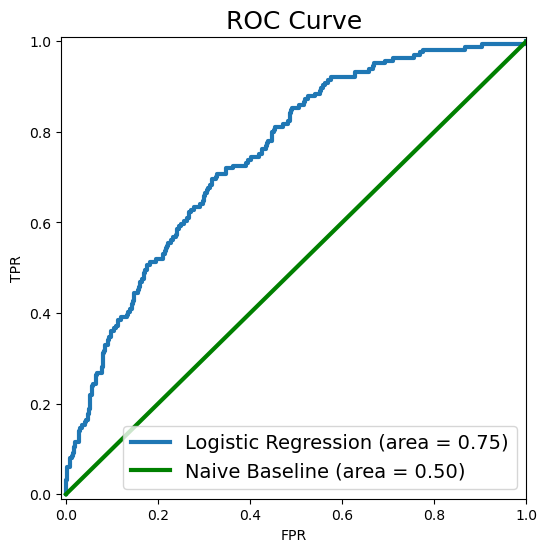

In [11]:
from sklearn.metrics import roc_curve, auc
FPR, TPR, _ = roc_curve(y_test, test_model)
roc_auc = auc(FPR, TPR)
plt.figure(figsize=(6, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=10)
plt.ylabel('TPR', fontsize=10)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(FPR, TPR, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', lw=3, linestyle='-', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()